In [1]:
# create bankend for Qiskit's AER (QSAM simulator)
from qiskit import Aer
aer_sim = Aer.get_backend('qasm_simulator')
import os
import threading
ionq_token="LAYq6EwdvXqh4sIma2iKZNQ2l7KzbxX6"
from qiskit_ionq import IonQProvider
from qiskit import QuantumCircuit, execute
from threading import Thread, Lock
provider = IonQProvider(ionq_token)

# show supported backends
print(provider.backends()) 

# create backends for simulator and hardware
backend_sim = provider.get_backend("ionq_simulator")
backend_qpu = provider.get_backend("ionq_qpu")

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


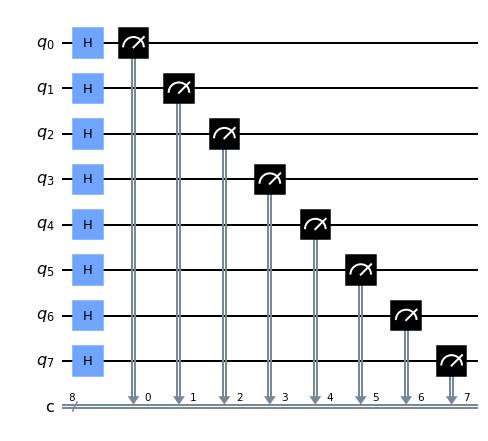

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(8,8)
for i in range(8):
    qc.h(i)

qc.measure([0,1,2,3,4,5,6,7],[0,1,2,3,4,5,6,7])

qc.draw(output='mpl')

In [62]:
#generates a byte, using 8 hadamards and single shot jobs
#This helps ensure that we preserve the distribution of the random output not just the summarized results IONQ provides.
def gen_byte():
    qpu_job = backend_qpu.run(qc, shots = 1)
    counts = qpu_job.get_counts()
    byte = list(counts.keys())[0]
    return byte

In [79]:
from array import *
import os

def gen_n_bytes(bytes, bin_array):
    bits = open("IONQ_1000_bytes.bin", "ab")

    for i in range(bytes):
        byte = gen_byte()
        bin_array.append(int(byte,2))

    bin_array.tofile(bits)

In [80]:
import time

start = time.time()

bin_array1 = array('B')
bin_array2 = array('B')

t1 = Thread(target = gen_n_bytes, args = [500, bin_array1])
t2 = Thread(target = gen_n_bytes, args = [500, bin_array2])

t1.start()
t2.start()

t1.join()
t2.join()

time = time.time() - start
print(time)
print(bin_array1)
print(bin_array2)

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/Users/mcbookair/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Users/mcbookair/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-79-ec07ccb6fe57>", line 8, in gen_n_bytes
    byte = gen_byte()
  File "<ipython-input-62-471e688949f6>", line 5, in gen_byte
    counts = qpu_job.get_counts()
  File "/Users/mcbookair/opt/anaconda3/lib/python3.7/site-packages/qiskit_ionq/ionq_job.py", line 214, in get_counts
    return self.result().get_counts(circuit)
  File "/Users/mcbookair/opt/anaconda3/lib/python3.7/site-packages/qiskit_ionq/ionq_job.py", line 259, in result
    self.wait_for_final_state()
  File "/Users/mcbookair/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/job.py", line 119, in wait_for_final_state
    status = self.status()
  File "/Users/mcbookair/opt/anaconda3/lib/pyt

KeyboardInterrupt: 

In [83]:
print(len(bin_array1))

175


In [84]:
print(time.time() - start)

57490.19270515442


In [85]:
print(len(bin_array2))

226


In [87]:
((len(bin_array1) + len(bin_array2))/57490.19270515442)*8

0.05580082182803989

In [91]:
bits = open("IONQ_DATASET_071422_THREADED.bin", "wb")

bin_array1.tofile(bits)
bin_array2.tofile(bits)

In [90]:
print(bin_array1)

array('B', [126, 81, 129, 167, 175, 11, 92, 115, 115, 7, 124, 29, 152, 89, 158, 255, 213, 121, 234, 113, 194, 224, 110, 107, 149, 139, 132, 228, 149, 66, 101, 170, 61, 251, 182, 60, 238, 51, 217, 168, 26, 6, 101, 195, 50, 241, 166, 48, 64, 19, 123, 13, 53, 216, 44, 76, 64, 44, 48, 87, 229, 157, 27, 85, 96, 149, 40, 117, 26, 252, 87, 12, 211, 133, 137, 34, 69, 232, 118, 161, 183, 226, 152, 160, 142, 171, 149, 57, 68, 141, 227, 54, 17, 61, 0, 224, 160, 217, 128, 14, 163, 21, 26, 6, 55, 60, 182, 238, 159, 62, 143, 76, 250, 18, 44, 18, 112, 188, 172, 59, 15, 48, 20, 208, 188, 153, 224, 137, 132, 184, 0, 229, 168, 34, 228, 5, 159, 222, 82, 58, 105, 79, 47, 164, 36, 112, 20, 98, 28, 175, 45, 64, 160, 3, 244, 211, 193, 66, 120, 15, 176, 210, 212, 212, 98, 226, 166, 197, 205, 166, 221, 111, 232, 124, 18])


In [92]:
print(bin_array2)

array('B', [63, 63, 71, 88, 213, 193, 28, 145, 90, 217, 210, 163, 33, 112, 68, 168, 148, 108, 109, 234, 128, 73, 220, 110, 238, 58, 4, 204, 57, 186, 175, 54, 92, 189, 114, 184, 254, 231, 186, 221, 173, 146, 25, 47, 217, 235, 80, 112, 52, 134, 51, 183, 41, 112, 173, 174, 251, 187, 202, 100, 128, 239, 120, 57, 11, 34, 73, 219, 160, 152, 131, 2, 66, 69, 206, 80, 63, 23, 206, 25, 81, 196, 255, 236, 192, 63, 93, 240, 3, 113, 235, 199, 194, 125, 232, 17, 227, 8, 0, 1, 137, 46, 132, 148, 50, 8, 108, 225, 113, 43, 169, 172, 181, 139, 99, 87, 24, 20, 106, 50, 141, 212, 148, 237, 11, 141, 15, 25, 68, 142, 29, 204, 34, 142, 237, 42, 139, 175, 50, 223, 186, 127, 139, 91, 83, 235, 206, 25, 31, 163, 174, 120, 137, 138, 214, 115, 147, 7, 217, 229, 192, 20, 90, 236, 20, 185, 14, 220, 69, 162, 30, 41, 203, 30, 158, 142, 7, 187, 109, 229, 200, 98, 140, 149, 57, 199, 153, 118, 110, 69, 57, 13, 189, 173, 156, 57, 102, 253, 51, 79, 180, 125, 13, 100, 106, 181, 41, 157, 70, 42, 34, 76, 218, 114, 139, 50, 13

In [105]:
start = time.time()

my_job = [None] * 2**(20)
#Creating a job list in order to reduce queue time
#Here we are queieing 130000 1 shot jobs that each generate 1 byte

for i in range(2**(20)):
    my_job[i] = backend_qpu.run(qc, shots = 1)

In [106]:
from qiskit.providers.jobstatus import JobStatus

my_results = []
for i in range(2**(20)):
    if my_job[i].status() is JobStatus.DONE:
        my_results.append(my_job[i].result())

In [107]:
print(len(my_results))

0


In [108]:
print(start)

1657991771.046653


In [110]:
print(my_job[0].result())

IonQAPIError: IonQAPIError(message='No error details provided.',status_code=502,error_type='internal_error')

In [111]:
print(len(my_results))

0
